<a href="https://colab.research.google.com/github/95lbh/Project1/blob/main/AIB_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 방향

*   장르 - 국가에 대한 판매량 : 각 나라가 선호하는 장르가 있는지

*   연도 - 국가에 대한 판매량 : 각 나라마다 출고량이 어떻게 변하고 있는지
*   연도별 게임의 트렌드 : 연도 - 게임 - 판매량
*   출고량이 높은 게임에 대한 분석
*   어떤 퍼블리셔가 적합한지.. (유리한 장르의 퍼블리셔)

-- 비전공자가 들어도 직관적으로 알 수 있게. 전문용어x 되도록 쉬운 길. 시각화 활용
<br> (어려운 통계를 활용하지 않고 합리적으로 설명할 수 있게 해 볼 예정)


## 1. 데이터 EDA , 전처리
 * 결측치 제거
 * 단위(K,M) 통일 후 수치형 데이터로 전환
 * 연도 정리


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv',index_col = 0)  # 데이터 불러오기
df = df.dropna()    # 결측치 제거
df.reset_index(inplace = True, drop= True)
print(df.shape)     # 사이즈 확인
df          
# 게임 이름  / 플랫폼 / 출시년도 / 장르 / 북미 출고량 / 유럽 출고량 / 일본 출고량 / 기타 출고량

(16241, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.dtypes   # 데이터 타입 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [4]:
df_tmp = df.loc[:,'NA_Sales': 'Other_Sales']        # numeric 으로 바꿀 부분 추출
df_tmp.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04


In [5]:
for names in df_tmp :                           # 해당 데이터를 numerical 하게 바꿈

    for idx, val in df_tmp[names].items() :

        if val[len(val)-1] == 'K' :
            new_num = float(val[:-1]) * 0.001

        elif val[len(val)-1] == 'M' :
            new_num = float(val[:-1])

        else :
            new_num = float(val)
        df_tmp.loc[idx,names] = new_num
        
df_tmp

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
...,...,...,...,...
16236,0.15,0.04,0,0.01
16237,0.01,0,0,0
16238,0.44,0.19,0.03,0.13
16239,0.05,0.05,0.25,0.03


In [6]:
df_tmp.dtypes

NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

In [7]:
np.int64(df.loc[:,'Year'])

array([2008, 2009, 2010, ..., 2015, 2013, 1996])

In [8]:
df.iloc[:,5:] = df_tmp
print(df.dtypes)
df

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
df = df.loc[ df.loc[:,'Year'] > 1900 ] # 연도중에 100 이하의 값 제거
df.loc[:,'Year'] = np.int64(df.loc[:,'Year'])
df = df.sort_values(['Year'])
df.reset_index(inplace = True, drop= True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0,0.01
1,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0,0.01
3,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0
4,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0,0.03
...,...,...,...,...,...,...,...,...,...
16136,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,Nippon Ichi Software,0,0.01,0.01,0
16137,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
16138,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
16139,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0


##  1. 장르 - 국가에 대한 판매량 : 각 나라가 선호하는 장르가 있는지 (1980~2020)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## 각 나라별로 분석을 할 예정임. 

In [11]:
# NA_Sales	EU_Sales	JP_Sales	Other_Sales
## 각 국가별 장르 판매량 합
na_gen = df.groupby(['Genre']).NA_Sales.sum()
na_gen = na_gen.sort_values(ascending= False)

eu_gen = df.groupby(['Genre']).EU_Sales.sum()
eu_gen = eu_gen.sort_values(ascending= False)

jp_gen = df.groupby(['Genre']).JP_Sales.sum()
jp_gen = jp_gen.sort_values(ascending= False)

ot_gen = df.groupby(['Genre']).Other_Sales.sum()
ot_gen = ot_gen.sort_values(ascending= False)

# df_gen = pd.DataFrame(columns= ['NA', 'EU', 'JP', 'Other'])        # DataFrame 화
# df_gen['NA'] = na_gen
# df_gen['EU'] = eu_gen
# df_gen['JP'] = jp_gen
# df_gen['Other'] = ot_gen


북미는 액션게임 스포츠, 슈팅게임 순으로 인기가 있다.
유럽은 액션게임 스포츠, 슈팅게임 순으로 북미와 같다
일본은 롤플레잉이 압도적이고 액션, 스포츠가 비슷하다
그 외 지역에서는 액션게임, 스포츠- 슈팅 게임 순이다
전체적으로 봤을 때 액션게임이 1위, 스포츠가 2위, 슈팅게임이 3위이다.


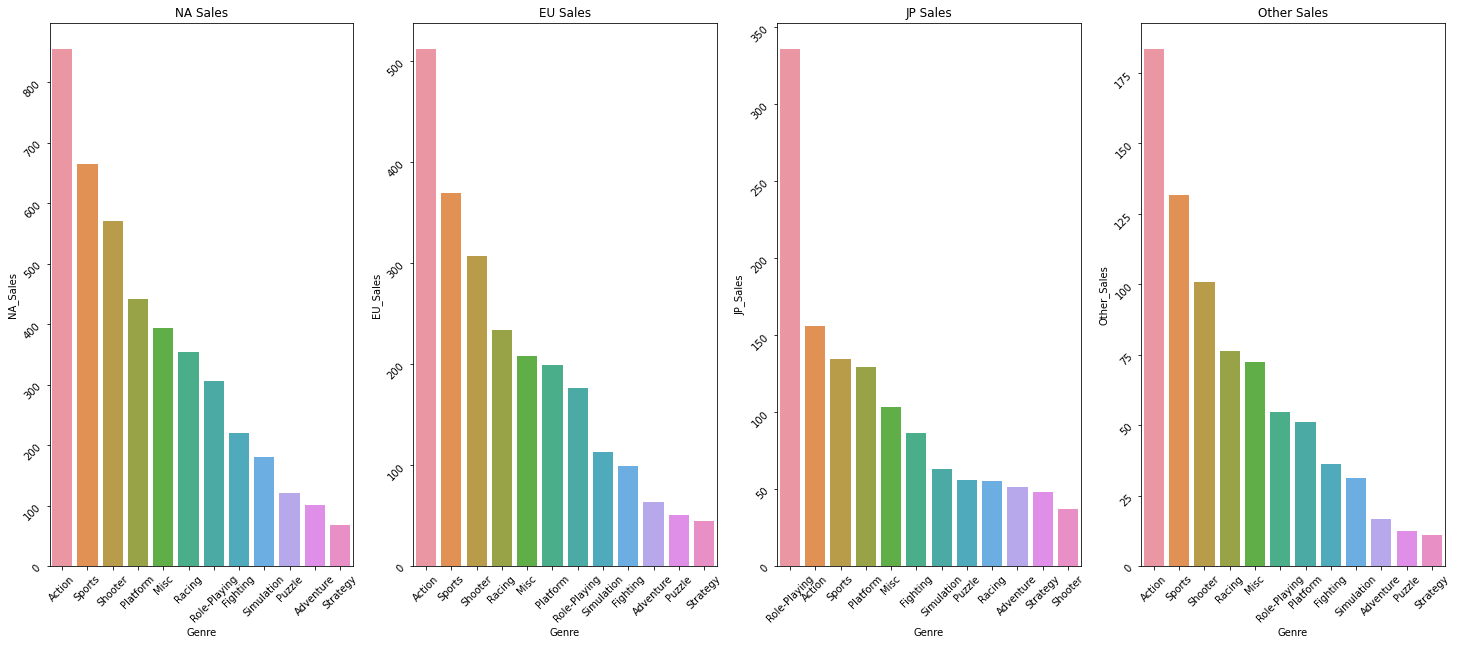

In [12]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)       # 4분할 그래프 생성

fig.set_size_inches(25,10)                          # 전체 그래프 사이즈 설정

## 각 그래프 타이틀zz
ax1.set(title = 'NA Sales')
ax2.set(title = 'EU Sales')
ax3.set(title = 'JP Sales')
ax4.set(title = 'Other Sales')

## 각 그래프 x축 라벨 기울이기
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
ax3.tick_params(labelrotation=45)
ax4.tick_params(labelrotation=45)

print('북미는 액션게임 스포츠, 슈팅게임 순으로 인기가 있다.')
print('유럽은 액션게임 스포츠, 슈팅게임 순으로 북미와 같다')
print('일본은 롤플레잉이 압도적이고 액션, 스포츠가 비슷하다')
print('그 외 지역에서는 액션게임, 스포츠- 슈팅 게임 순이다')
print('전체적으로 봤을 때 액션게임이 1위, 스포츠가 2위, 슈팅게임이 3위이다.')

sns.barplot(x = na_gen.index , y = na_gen, ax = ax1)
sns.barplot(x = eu_gen.index , y = eu_gen, ax = ax2)
sns.barplot(x = jp_gen.index , y = jp_gen, ax = ax3)
sns.barplot(x = ot_gen.index , y = ot_gen, ax = ax4)

## 2-1 .연도별 플랫폼의 추세

In [13]:
df_all = df.iloc[:,:5]
df_all['Sales'] = 0
for i in df.index :
    df_all.iloc[i,-1]  = df.iloc[i,5:].sum()

df_all.head()

,Name,Platform,Year,Genre,Publisher,Sales
0,Boxing,2600,1980,Fighting,Activision,0.77
1,Freeway,2600,1980,Action,Activision,0.34
2,Defender,2600,1980,Misc,Atari,1.05
3,Checkers,2600,1980,Misc,Atari,0.23
4,Missile Command,2600,1980,Shooter,Atari,2.76


---

In [14]:
bins = list(range(1980, 2021, 10))
bins_label = [str(x)+"'s" for x in bins]
print(bins_label)

df_all['Decade'] = pd.cut(df_all['Year'], bins, right=False, labels=bins_label[:-1])
df_all = df_all.dropna()
df_all

["1980's", "1990's", "2000's", "2010's", "2020's"]


,Name,Platform,Year,Genre,Publisher,Sales,Decade
0,Boxing,2600,1980,Fighting,Activision,0.77,1980's
1,Freeway,2600,1980,Action,Activision,0.34,1980's
2,Defender,2600,1980,Misc,Atari,1.05,1980's
3,Checkers,2600,1980,Misc,Atari,0.23,1980's
4,Missile Command,2600,1980,Shooter,Atari,2.76,1980's
...,...,...,...,...,...,...,...
16135,Valkyria Chronicles,PS4,2016,Role-Playing,Sega,0.17,2010's
16136,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,Nippon Ichi Software,0.02,2010's
16137,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.01,2010's
16138,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.03,2010's


In [15]:
df_ht = df_all.loc[:,['Platform','Year','Sales']]
df_ht = df_ht.groupby(['Platform','Year']).Sales.sum()
df_ht = pd.DataFrame(data = df_ht)
df_ht = df_ht.reset_index()
df_ht

,Platform,Year,Sales
0,2600,1980,10.88
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
235,XB,2008,0.18
236,XOne,2013,18.61
237,XOne,2014,52.44
238,XOne,2015,57.65


In [16]:
df_ht2 = df_ht.pivot('Platform','Year','Sales')

연도별로 플랫폼의 트렌드를 분석 해보았을 때 붉은 부분이 해당 플랫폼이 성행했을 때이다. 최근 데이터를 보면 3DS, PS3, PS4, WiiU, X360, XOne 이 인기가 있다.


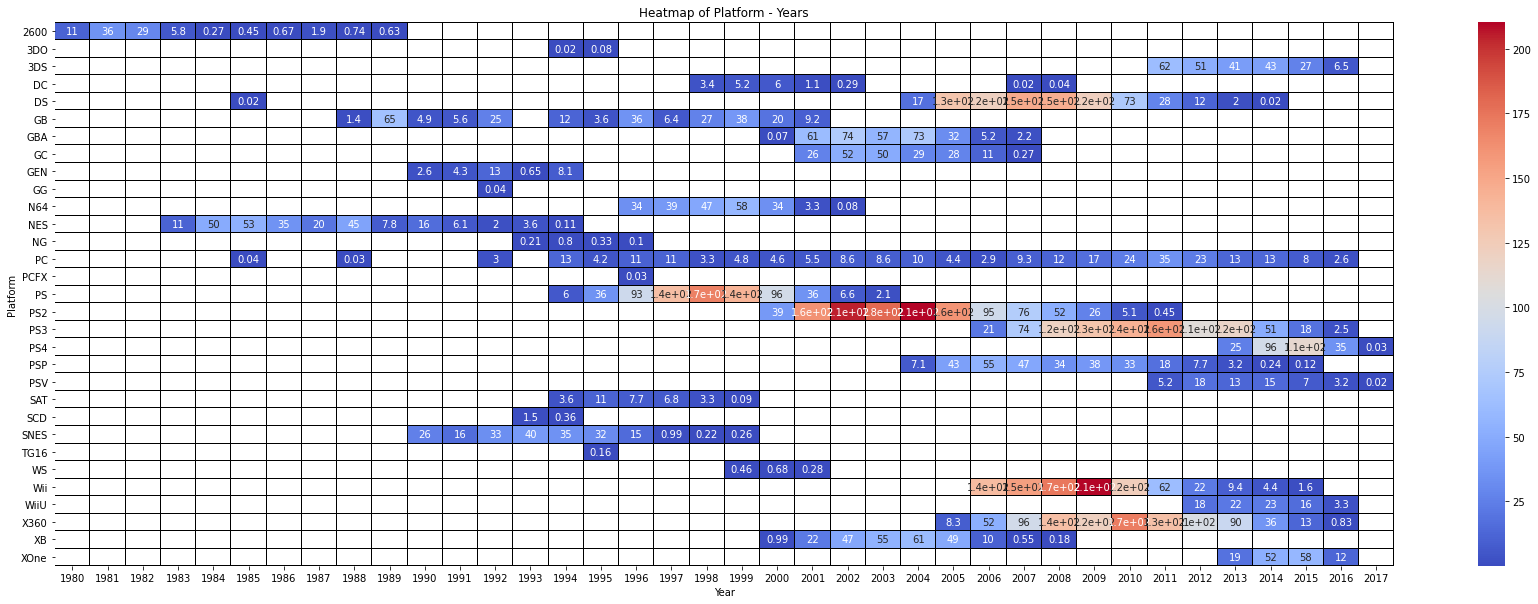

In [17]:
plt.rcParams['figure.figsize'] = [30,10]
sns.heatmap(df_ht2, cmap= 'coolwarm',annot=True, linewidths= 0.01, linecolor='black')
plt.title('Heatmap of Platform - Years')
print('연도별로 플랫폼의 트렌드를 분석 해보았을 때 붉은 부분이 해당 플랫폼이 성행했을 때이다. 최근 데이터를 보면 3DS, PS3, PS4, WiiU, X360, XOne 이 인기가 있다.')
plt.show()

## 2-2 . 연도에따른 게임 장르에 대한 분석

In [18]:
df_ht_gen = df_all.loc[:,['Genre','Year','Sales']]
df_ht_gen = df_ht_gen.groupby(['Genre','Year']).Sales.sum()
df_ht_gen = pd.DataFrame(data = df_ht_gen)
df_ht_gen = df_ht_gen.reset_index()
df_ht_gen
df_ht_gen2 = df_ht_gen.pivot('Genre','Year','Sales')

연도별로 장르의 트렌드를 분석 해보았을 때 붉은 부분이 해당 플랫폼이 성행했을 때이다. 최근 데이터를 보면 3DS, PS3, PS4, WiiU, X360, XOne 이 인기가 있다.


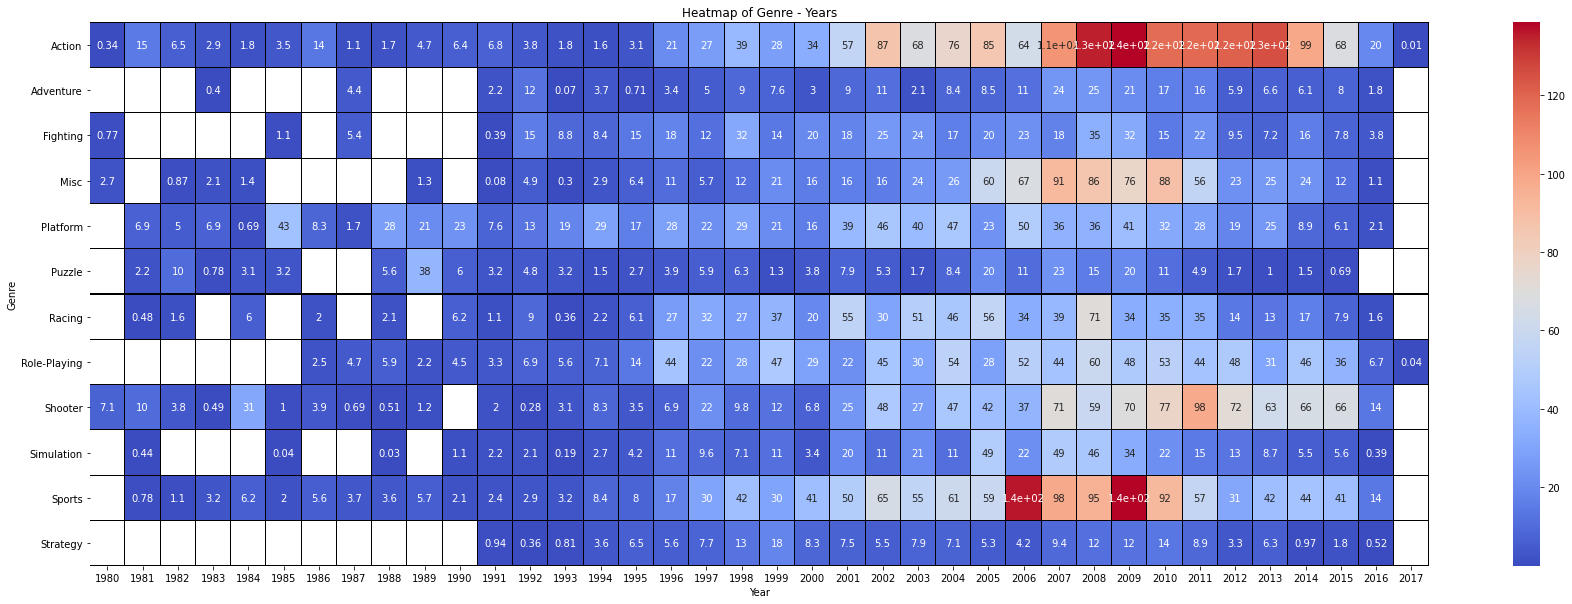

In [19]:
plt.rcParams['figure.figsize'] = [30,10]
sns.heatmap(df_ht_gen2, cmap= 'coolwarm',annot=True,linecolor='black', linewidth=0.01 )
plt.title('Heatmap of Genre - Years')
print('연도별로 장르의 트렌드를 분석 해보았을 때 붉은 부분이 해당 플랫폼이 성행했을 때이다. 최근 데이터를 보면 3DS, PS3, PS4, WiiU, X360, XOne 이 인기가 있다.')
plt.show()

-------------


## 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [20]:
## 출고량 순으로 sorting 
df_sale = df_all.sort_values('Sales',ascending = False)
df_sale = df_sale.reset_index(drop=True)
df_sale.head()

,Name,Platform,Year,Genre,Publisher,Sales,Decade
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74,2000's
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24,1980's
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83,2000's
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00,2000's
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38,1990's


In [21]:
## 판매량이 1000만 이상인 데이터만 추출 (60개)
df_top_sale = df_sale[df_sale.Sales >= 10]
df_top_sale

,Name,Platform,Year,Genre,Publisher,Sales,Decade
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74,2000's
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24,1980's
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83,2000's
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00,2000's
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38,1990's
5,Tetris,GB,1989,Puzzle,Nintendo,30.26,1980's
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01,2000's
7,Wii Play,Wii,2006,Misc,Nintendo,29.01,2000's
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61,2000's
9,Duck Hunt,NES,1984,Shooter,Nintendo,28.31,1980's


In [22]:
## 출고량이 많은 출판사 상위권
grp_pub = df_top_sale.groupby('Publisher').Sales.sum()
grp_pub = pd.DataFrame(data = grp_pub)
grp_pub = grp_pub.sort_values('Sales',ascending=False)

In [23]:
df_top_cnt = pd.DataFrame(df_top_sale['Publisher'].value_counts())
df_top_cnt['Percent'] = (10*df_top_cnt['Publisher']/ len(df_top_cnt)).round(2)
df_top_cnt

,Publisher,Percent
Nintendo,35,58.33
Activision,10,16.67
Take-Two Interactive,8,13.33
Sony Computer Entertainment,4,6.67
Microsoft Game Studios,2,3.33
Ubisoft,1,1.67


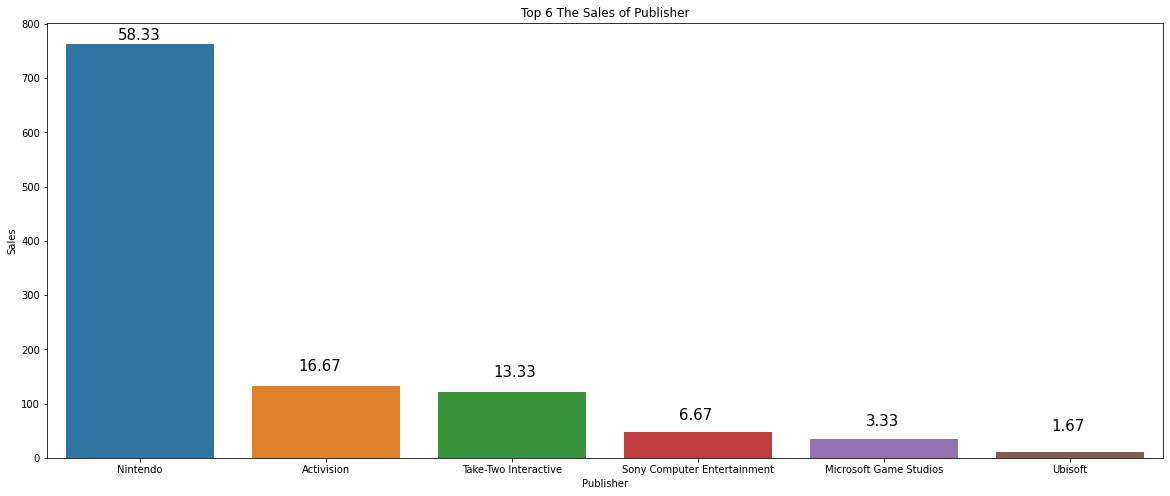

In [24]:
from numpy.ma.core import size
plt.rcParams['figure.figsize'] = [20,8]
plt.title('Top 6 The Sales of Publisher')
plt.text(-0.12,770,df_top_cnt.iloc[0,1],size=15)
plt.text(0.85,160,df_top_cnt.iloc[1,1],size=15)
plt.text(1.9,150,df_top_cnt.iloc[2,1],size=15)
plt.text(2.9,70,df_top_cnt.iloc[3,1],size=15)
plt.text(3.9,60,df_top_cnt.iloc[4,1],size=15)
plt.text(4.9,50,df_top_cnt.iloc[5,1],size=15)

sns.barplot(x = grp_pub.index, y = 'Sales', data = grp_pub)

# 결론
##1. 장르  
###액션 -> 스포츠/슈팅  . 
###        일본: 롤플레잉(강력)

## 2. 플랫폼
### PS4 -> Xone/ 3DS

## 3. 퍼블리셔
## Nintendo (강력)


# ----

In [ ]:
## 출고량이 많은 플랫폼
grp_plat = df_top_sale.groupby('Platform').Sales.sum()
grp_plat = pd.DataFrame(data = grp_plat)
grp_plat 

## Clustering (X) <br> 
 데이터가 어떤 특징으로 무언가 분류가 되는지

 - 결론 : 특정한 패턴이 없어 일정 그룹으로는 나뉘어지지 않는다.

In [1]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_clust = df.iloc[:,5:]
df_clust.head()

In [ ]:
Z = StandardScaler().fit_transform(df_clust)        # 정규화
Z

In [ ]:
sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(Z)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.rcParams['figure.figsize'] = [20,5]
plt.show()


In [ ]:
import scipy.cluster.hierarchy as hi
plt.title('Dendrograms "Ward"')
hi.dendrogram(hi.linkage(Z,method='ward'))      # linkage 메소드를 ward 로 사용했을 경우
plt.show()

In [ ]:
##  K means 시행
k_mean = KMeans(n_clusters=2)
k_mean.fit(Z)
labels = k_mean.labels_
labels

In [ ]:
## PCA 후 분류 관측

pca = PCA(2)                # 2개로 PCAc
pc = pca.fit_transform(Z)

df_pc = pd.DataFrame(pc,columns=['PC1','PC2'])
df_pc['Predict'] = labels
df_pc.head()

sns.scatterplot(x='PC1',y='PC2',data=df_pc,hue='Predict')